**ID - 2215151038**

**Name - Musber Ahmed Sadman**

**Sec - 7A2**

Course Code - CSE 413

Course Name - Simulation and Modeling Lab

In [1]:
import numpy as np
from sympy import Matrix
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
#Randomly generate 50 values from a normal distribution with a chosen mean (μ1 = 100) and standard deviation (i.e. 5).
nvalues1 = np.random.normal(100,5,50)

In [3]:
#Randomly generate 50 values from a normal distribution with a chosen mean (μ1 = 200) and standard deviation (i.e. 6).
nvalues2 = np.random.normal(200,6,50)

In [4]:
#Generate two sets of from a normal distribution and perform a two-sample t-test.

t_statistic, p_value = stats.ttest_ind(nvalues1, nvalues2, equal_var=True)

mean_diff = np.mean(nvalues1) - np.mean(nvalues2)
std_err = np.sqrt(np.var(nvalues1, ddof=1)/len(nvalues1) + np.var(nvalues2, ddof=1)/len(nvalues2))
df = (std_err**4) / ((np.var(nvalues1, ddof=1)/len(nvalues1))**2 / (len(nvalues1)-1) + (np.var(nvalues2, ddof=1)/len(nvalues2))**2 / (len(nvalues2)-1))
ci = stats.t.interval(0.95, df, loc=mean_diff, scale=std_err)

In [5]:
print(f'Sample 1 Mean: {np.mean(nvalues1):.2f}')
print(f'Sample 2 Mean: {np.mean(nvalues2):.2f}')
print(f't-Statistic: {t_statistic:.2f}')
print(f'p-Value: {p_value:.4f}')
print(f'Degree of Freedom: {df:.2f}')
print(f'95% Confidence Interval: ({ci[0]:.2f}, {ci[1]:.2f})')

Sample 1 Mean: 100.01
Sample 2 Mean: 199.39
t-Statistic: -90.33
p-Value: 0.0000
Degree of Freedom: 91.09
95% Confidence Interval: (-101.56, -97.19)


In [6]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The means of the two samples are significantly different.")
else:
    print("Fail to reject the null hypothesis. The means of the two samples are not significantly different.")

Reject the null hypothesis. The means of the two samples are significantly different.


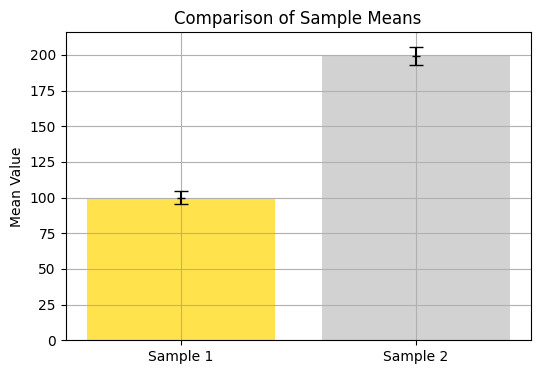

In [7]:
plt.figure(figsize=(6, 4))
plt.bar(['Sample 1', 'Sample 2'], [np.mean(nvalues1), np.mean(nvalues2)], color=['gold', 'silver'], alpha=0.7)
plt.errorbar(['Sample 1', 'Sample 2'], [np.mean(nvalues1), np.mean(nvalues2)], yerr=[np.std(nvalues1, ddof=1), np.std(nvalues2, ddof=1)], fmt='k_', capsize=5)
plt.title('Comparison of Sample Means')
plt.ylabel('Mean Value')
plt.grid(True)
plt.show()